In [ ]:
!pip install mycolorpy

  Preparing metadata (setup.py) ... done
  Created wheel for mycolorpy: filename=mycolorpy-1.5.1-py3-none-any.whl size=3850 sha256=f8fdb1b6773b4d26a43a4ea4b6bf35d62a3429d0d8949d016f65ae67a2cc8f10
  Stored in directory: /root/.cache/pip/wheels/ff/08/3f/5b1529bd9a56c309bc2b6509247e7f7968b3558c6090ce30ee
Successfully built mycolorpy


In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs, make_circles, make_moons
from sklearn.metrics import pairwise_distances_argmin
from mycolorpy import colorlist as mcp

# Algorytm K-means

In [ ]:
X, y_true = make_blobs(n_samples=600, centers=3, cluster_std=0.6, random_state=0)

In [ ]:
rng = np.random.RandomState(233)
i = rng.permutation(X.shape[0])[:3]
centers = X[i]
labels = pairwise_distances_argmin(X, centers)

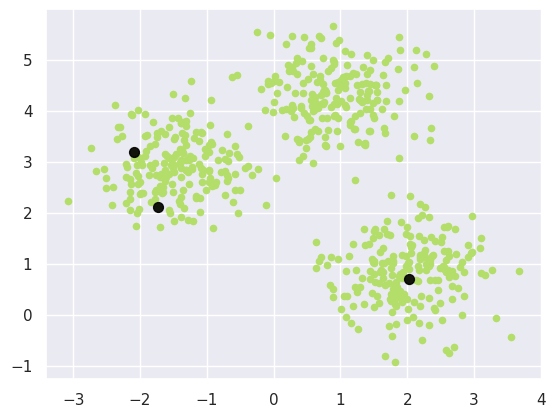

In [ ]:
plt.scatter(X[:, 0], X[:, 1], s=20, color = mcp.gen_color(cmap="Set3",n=12)[6])
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=50, alpha=0.9)
plt.show()

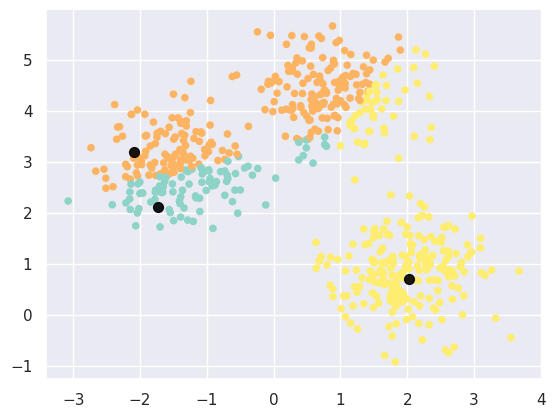

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=20, cmap='Set3_r')
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=50, alpha=0.9)
plt.show()

In [ ]:
new_centers = np.array([X[labels == i].mean(0)
                                for i in range(3)])
centers = new_centers
labels= pairwise_distances_argmin(X, centers)

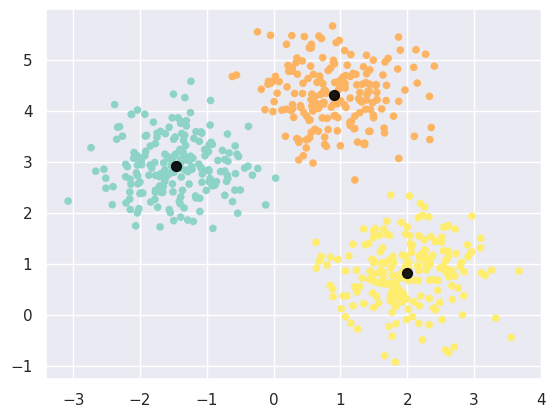

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=labels,s=20, cmap='Set3_r')
#plt.scatter(X[:, 0], X[:, 1], s=20, color = mcp.gen_color(cmap="Set3",n=12)[6])
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=50, alpha=0.9);
plt.show()

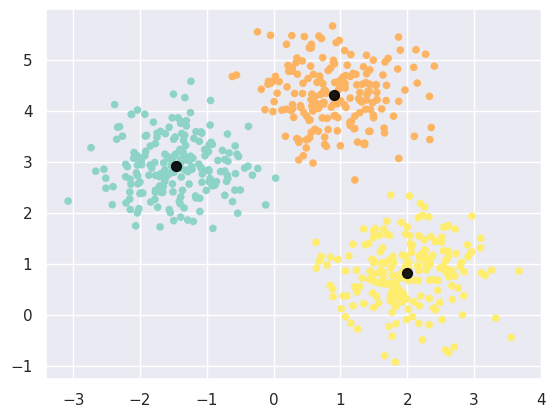

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=20, cmap='Set3_r')
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=50, alpha=0.9);
plt.show()

# Blobs

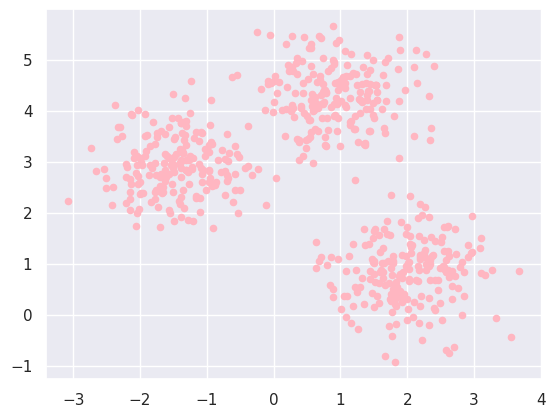

In [ ]:
plt.scatter(X[:, 0], X[:, 1], s=20, color = 'lightpink')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=3, n_init = 10)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

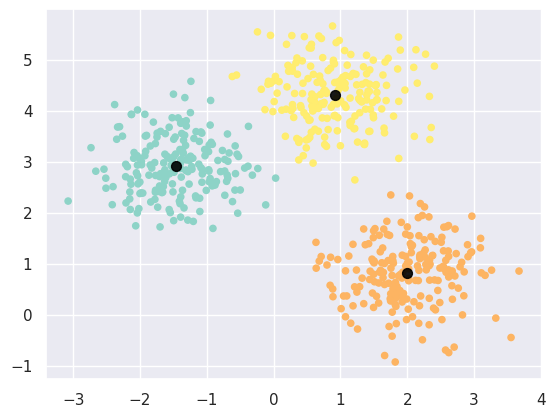

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=20, cmap='Set3_r')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=50, alpha=0.9);
plt.show()

# Księżyce

In [ ]:
X, y = make_moons(400, noise=.05, random_state=0)

In [ ]:
kmeans = KMeans(n_clusters=2, n_init = 10)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)


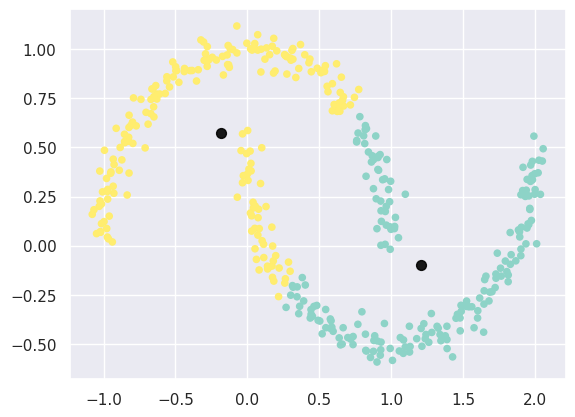

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=20, cmap='Set3_r')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=50, alpha=0.9);
plt.show()

# Koła

In [ ]:
X, y = make_circles(600, factor=0.5, noise = 0.05, random_state=0)
kmeans = KMeans(n_clusters=2, n_init = 10)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

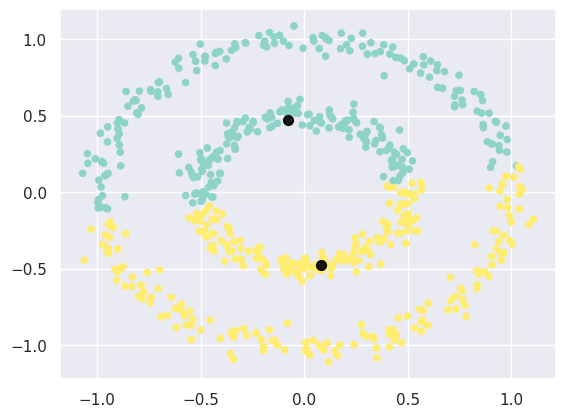

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=20, cmap='Set3_r')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=50, alpha=0.9);
plt.show()

# Redukcja kolorów za pomocą algorytmu k-means

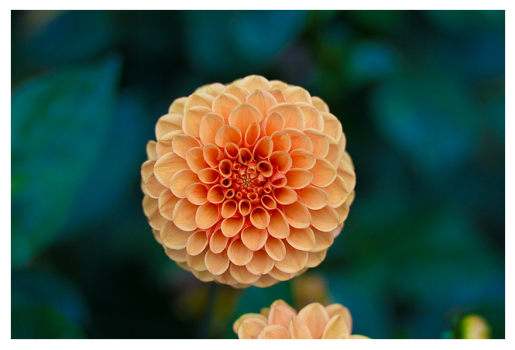

In [ ]:
from sklearn.datasets import load_sample_image
china = load_sample_image("flower.jpg")
ax = plt.axes(xticks=[], yticks=[])
ax.imshow(china);

array([[[ 2, 19, 13],
        [ 3, 18, 13],
        [ 7, 20, 13],
        ...,
        [ 1, 77, 64],
        [ 0, 76, 64],
        [ 0, 75, 63]],

       [[ 1, 18, 12],
        [ 3, 18, 13],
        [ 7, 20, 13],
        ...,
        [ 0, 76, 64],
        [ 1, 74, 65],
        [ 1, 74, 65]],

       [[ 2, 17, 12],
        [ 6, 19, 12],
        [ 7, 20, 13],
        ...,
        [ 1, 74, 65],
        [ 1, 74, 67],
        [ 1, 74, 67]],

       ...,

       [[ 0, 46, 40],
        [ 1, 48, 40],
        [ 1, 47, 37],
        ...,
        [ 5, 44, 26],
        [ 6, 43, 26],
        [ 7, 44, 27]],

       [[ 0, 47, 41],
        [ 1, 48, 40],
        [ 1, 47, 37],
        ...,
        [ 6, 45, 27],
        [ 7, 44, 27],
        [ 7, 44, 27]],

       [[ 0, 47, 41],
        [ 1, 48, 40],
        [ 0, 46, 36],
        ...,
        [ 7, 46, 28],
        [ 8, 45, 28],
        [ 9, 43, 27]]], dtype=uint8)
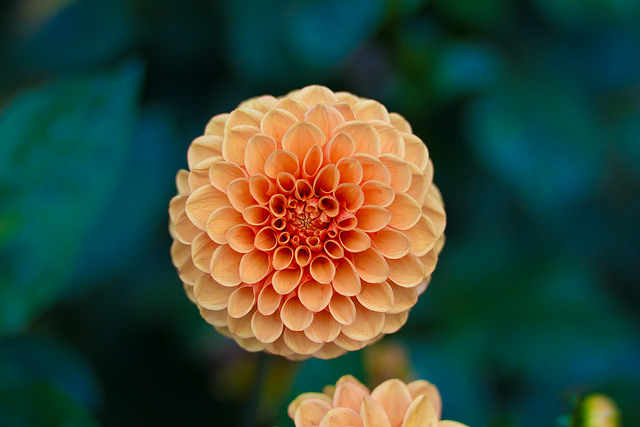

In [ ]:
china

In [ ]:
data = china / 255.0
print(data.shape)
data = data.reshape(427 * 640, 3)
data.shape

(427, 640, 3)


(273280, 3)

In [ ]:
def plot_pixels(data, title, colors=None, N=10000):
    if colors is None:
        colors = data

    # choose a random subset
    rng = np.random.RandomState(0)
    i = rng.permutation(data.shape[0])[:N]
    colors = colors[i]
    R, G, B = data[i].T

    fig, ax = plt.subplots(1, 2, figsize=(16, 6))
    ax[0].scatter(R, G, color=colors, marker='.')
    ax[0].set(xlabel='Red', ylabel='Green', xlim=(0, 1), ylim=(0, 1))

    ax[1].scatter(R, B, color=colors, marker='.')
    ax[1].set(xlabel='Red', ylabel='Blue', xlim=(0, 1), ylim=(0, 1))

    fig.suptitle(title, size=20);

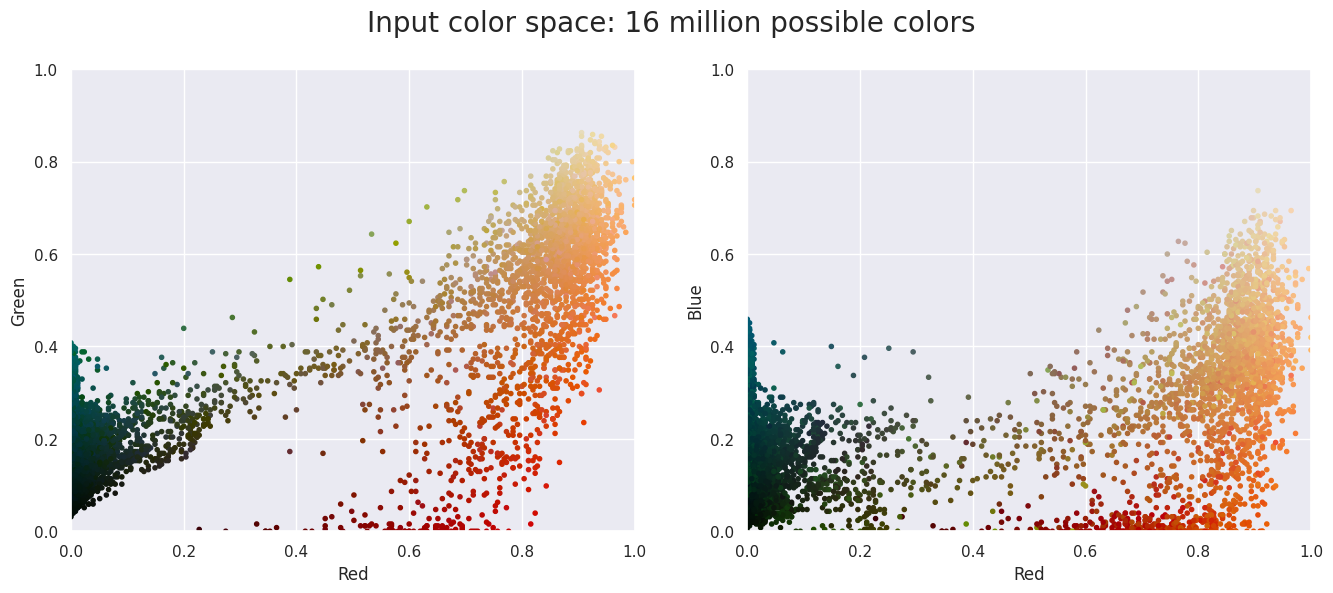

In [ ]:
plot_pixels(data, title='Input color space: 16 million possible colors')


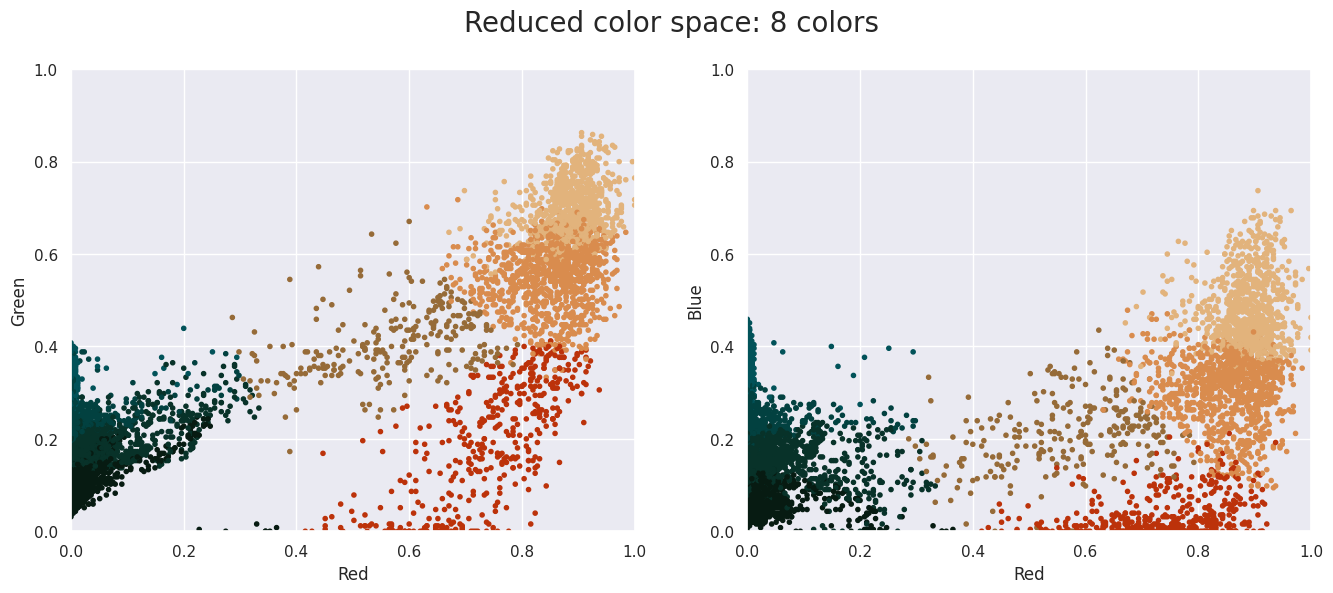

In [ ]:
import warnings; warnings.simplefilter('ignore')  # Fix NumPy issues.

from sklearn.cluster import MiniBatchKMeans
kmeans = MiniBatchKMeans(8)
kmeans.fit(data)
new_colors = kmeans.cluster_centers_[kmeans.predict(data)]

plot_pixels(data, colors=new_colors,
            title="Reduced color space: 8 colors")


In [ ]:
kmeans = MiniBatchKMeans(32)
kmeans.fit(data)
new_colors_32 = kmeans.cluster_centers_[kmeans.predict(data)]
kmeans = MiniBatchKMeans(16)
kmeans.fit(data)
new_colors_16 = kmeans.cluster_centers_[kmeans.predict(data)]
kmeans = MiniBatchKMeans(8)
kmeans.fit(data)
new_colors_8 = kmeans.cluster_centers_[kmeans.predict(data)]

Text(0.5, 1.0, '8 colors')

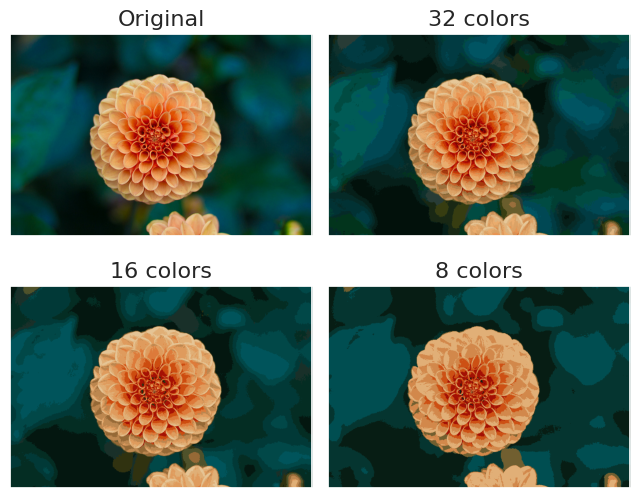

In [ ]:
china_recolored_32 = new_colors_32.reshape(china.shape)
china_recolored_16 = new_colors_16.reshape(china.shape)
china_recolored_8 = new_colors_8.reshape(china.shape)

fig, ax = plt.subplots(2, 2, figsize=(8, 6),
                       subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax[0][0].imshow(china)
ax[0][0].set_title('Original', size=16)
ax[0][1].imshow(china_recolored_32)
ax[0][1].set_title('32 colors', size=16)
ax[1][0].imshow(china_recolored_16)
ax[1][0].set_title('16 colors', size=16)
ax[1][1].imshow(china_recolored_8)
ax[1][1].set_title('8 colors', size=16)


In [ ]:
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision

transform = torchvision.transforms.Compose([torchvision.transforms.ToTensor()])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)

batch_size = 100
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True)
testloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True)


100%|██████████| 170M/170M [00:02<00:00, 79.8MB/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


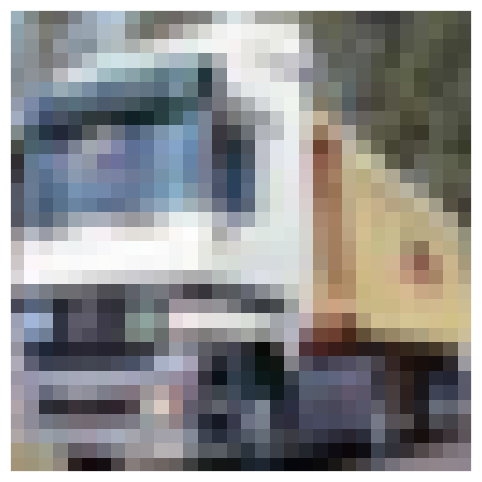

In [ ]:
images = trainset.data
labels = trainset.targets

fig, ax = plt.subplots(1, 1, figsize=(8, 6),
                       subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax.imshow(images[1])

In [ ]:
dane = images[0:100]
dane = dane / 255.0
dane_reshape = [dane[i].reshape(1024,3) for i in range(len(dane))]


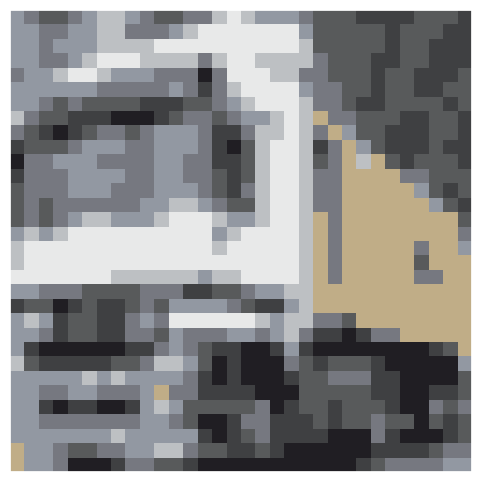

In [ ]:
import warnings; warnings.simplefilter('ignore')  # Fix NumPy issues.

from sklearn.cluster import MiniBatchKMeans

kmeans = MiniBatchKMeans(8)
images_recolored = []
for i in range(len(dane_reshape)):
  kmeans.fit(dane_reshape[i])
  new_colors = (kmeans.cluster_centers_[kmeans.predict(dane_reshape[i])])

  images_recolored.append(new_colors.reshape(images[0].shape))

fig, ax = plt.subplots(1, 1, figsize=(8, 6),
                       subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax.imshow(images_recolored[1])

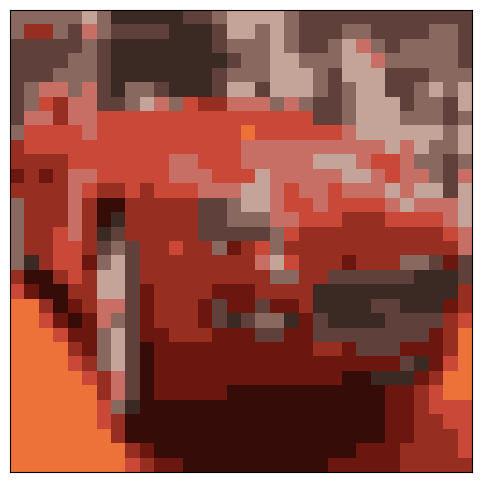

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6),
                       subplot_kw=dict(xticks=[], yticks=[]))
fig.subplots_adjust(wspace=0.05)
ax.imshow(images_recolored[5])